In [38]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

%matplotlib inline

/tmp/ipykernel_318166/2575826165.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [43]:
dancer_per_zip_df = pd.read_csv('./Data/dancer-per-zip.csv', index_col='zip_code')

In [59]:
dancer_per_zip_df['dancer_in_zip'][90431]

2

In [102]:
def lookup(zip):
    try:
        return dancer_per_zip_df['dancer_in_zip'][int(zip)]
    except:
        return 0

In [103]:
plz_shape_df = gpd.read_file('./Data/plz-5stellig.shp', dtype={'plz': str})

In [104]:
plz_shape_df.head()

,plz,note,einwohner,qkm,geometry
0,81248,81248 MÃ¼nchen,121,1.984763,"POLYGON ((11.39468 48.14729, 11.39490 48.14780..."
1,60315,60315 Frankfurt am Main (FOUR),0,0.017481,"POLYGON ((8.67254 50.11264, 8.67259 50.11264, ..."
2,24988,24988 Oeversee,3350,36.491463,"POLYGON ((9.36585 54.69994, 9.36683 54.70014, ..."
3,93185,93185 Michelsneukirchen,1786,32.873844,"POLYGON ((12.47666 49.13598, 12.47702 49.13637..."
4,93489,93489 Schorndorf,2622,38.597260,"POLYGON ((12.54904 49.19318, 12.54953 49.19371..."


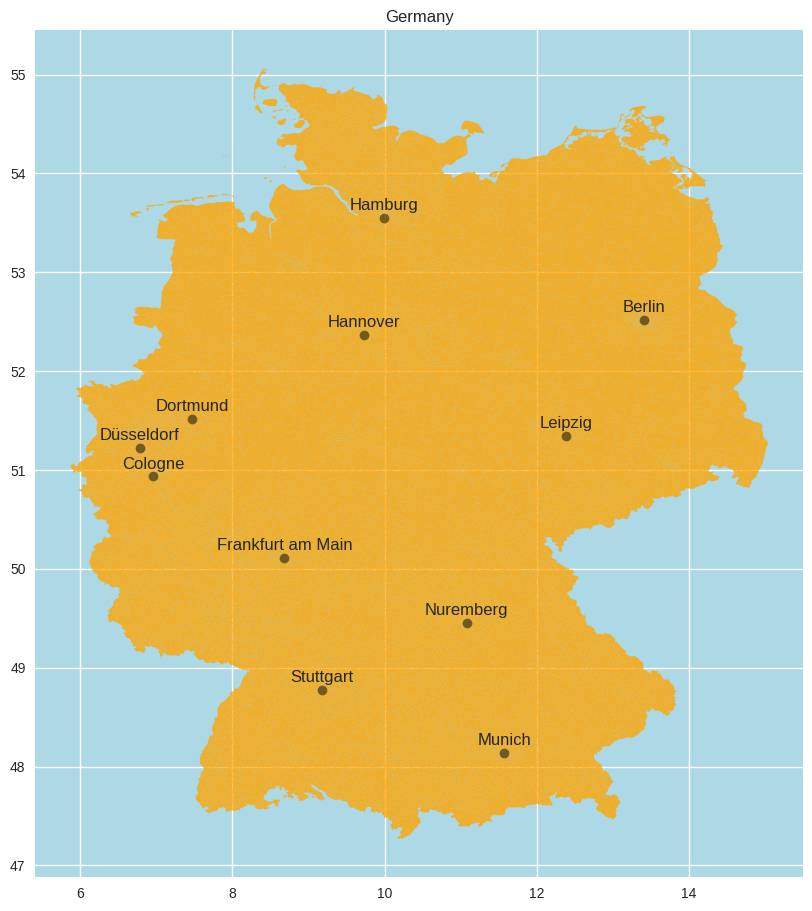

In [105]:
plt.rcParams['figure.figsize'] = [16, 11]

# Get lat and lng of Germany's main cities. 
top_cities = {
    'Berlin': (13.404954, 52.520008), 
    'Cologne': (6.953101, 50.935173),
    'Düsseldorf': (6.782048, 51.227144),
    'Frankfurt am Main': (8.682127, 50.110924),
    'Hamburg': (9.993682, 53.551086),
    'Leipzig': (12.387772, 51.343479),
    'Munich': (11.576124, 48.137154),
    'Dortmund': (7.468554, 51.513400),
    'Stuttgart': (9.181332, 48.777128),
    'Nuremberg': (11.077438, 49.449820),
    'Hannover': (9.73322, 52.37052)
}

fig, ax = plt.subplots()

plz_shape_df.plot(ax=ax, color='orange', alpha=0.8)

# Plot cities. 
for c in top_cities.keys():
    # Plot city name.
    ax.text(
        x=top_cities[c][0], 
        # Add small shift to avoid overlap with point.
        y=top_cities[c][1] + 0.08, 
        s=c, 
        fontsize=12,
        ha='center', 
    )
    # Plot city location centroid.
    ax.plot(
        top_cities[c][0], 
        top_cities[c][1], 
        marker='o',
        c='black', 
        alpha=0.5
    )

ax.set(
    title='Germany', 
    aspect=1.3, 
    facecolor='lightblue'
);

In [106]:
# Create feature.
plz_shape_df = plz_shape_df \
    .assign(first_dig_plz = lambda x: x['plz'].str.slice(start=0, stop=1))

In [107]:
plz_shape_df['dancer_count'] = plz_shape_df['plz'].map(lookup)

In [108]:
plz_shape_df

,plz,note,einwohner,qkm,geometry,first_dig_plz,dancer_count
0,81248,81248 MÃ¼nchen,121,1.984763,"POLYGON ((11.39468 48.14729, 11.39490 48.14780...",8,0
1,60315,60315 Frankfurt am Main (FOUR),0,0.017481,"POLYGON ((8.67254 50.11264, 8.67259 50.11264, ...",6,0
2,24988,24988 Oeversee,3350,36.491463,"POLYGON ((9.36585 54.69994, 9.36683 54.70014, ...",2,1
3,93185,93185 Michelsneukirchen,1786,32.873844,"POLYGON ((12.47666 49.13598, 12.47702 49.13637...",9,4
4,93489,93489 Schorndorf,2622,38.597260,"POLYGON ((12.54904 49.19318, 12.54953 49.19371...",9,4
...,...,...,...,...,...,...,...
8165,63874,63874 Dammbach,1819,32.868150,"POLYGON ((9.28704 49.86601, 9.28707 49.86608, ...",6,2
8166,63856,63856 Bessenbach,5844,29.859154,"POLYGON ((9.21845 49.96548, 9.22015 49.96586, ...",6,3
8167,63869,63869 HeigenbrÃ¼cken,2208,8.415089,"POLYGON ((9.30293 50.04595, 9.30574 50.05000, ...",6,1
8168,75339,75339 HÃ¶fen an der Enz,1619,9.081771,"POLYGON ((8.55002 48.79175, 8.55007 48.79177, ...",7,2


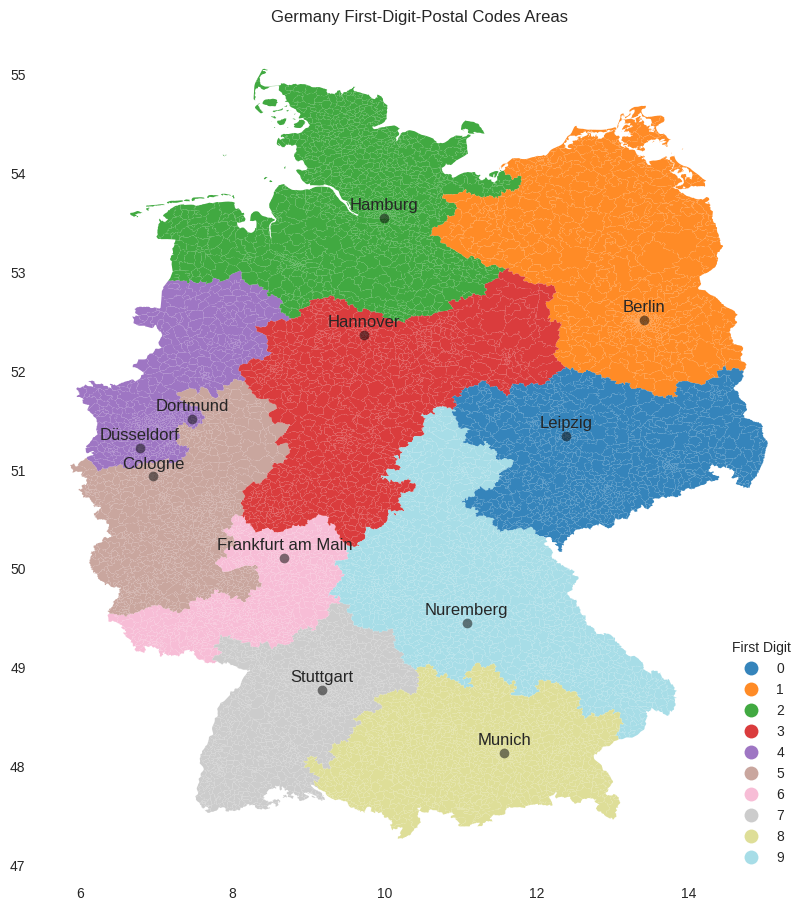

In [113]:
fig, ax = plt.subplots()

plz_shape_df.plot(
    ax=ax, 
    column='first_dig_plz', 
    categorical=True, 
    legend=True, 
    legend_kwds={'title':'First Digit', 'loc':'lower right'},
    cmap='tab20',
    alpha=0.9
)

for c in top_cities.keys():

    ax.text(
        x=top_cities[c][0], 
        y=top_cities[c][1] + 0.08, 
        s=c, 
        fontsize=12,
        ha='center', 
    )

    ax.plot(
        top_cities[c][0], 
        top_cities[c][1], 
        marker='o',
        c='black', 
        alpha=0.5
    )

ax.set(
    title='Germany First-Digit-Postal Codes Areas', 
    aspect=1.3,
    facecolor='white'
);


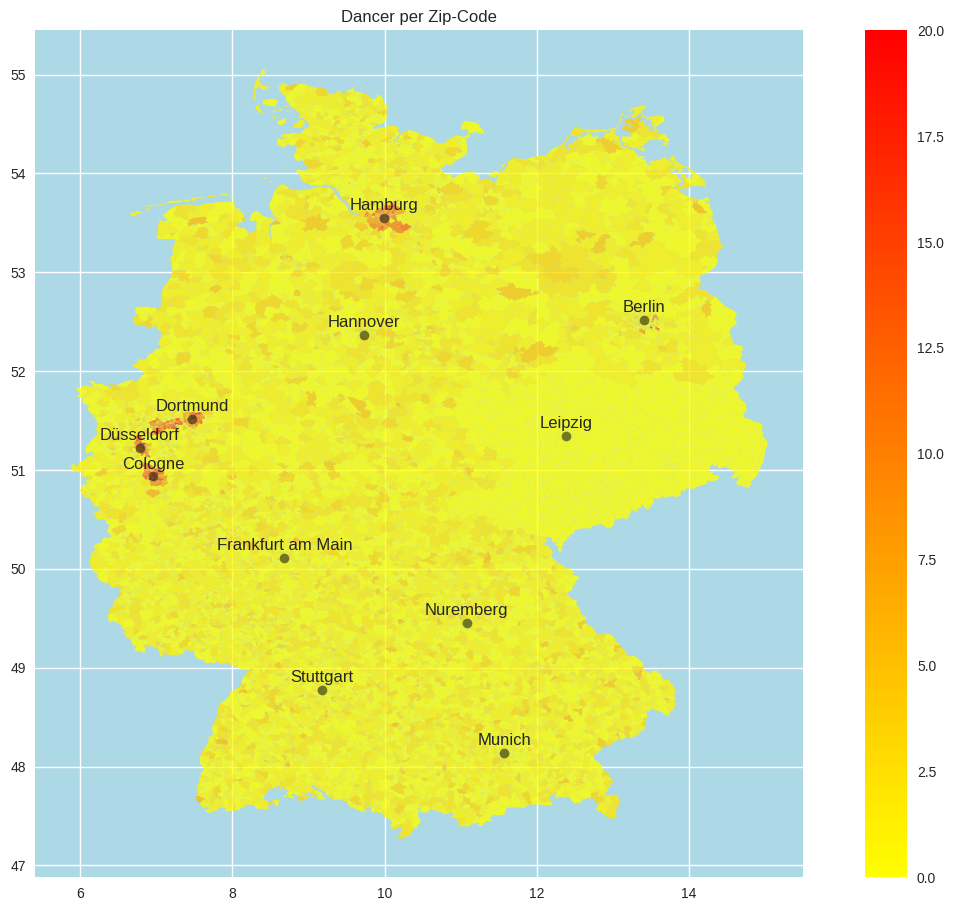

In [114]:
fig, ax = plt.subplots()

plz_shape_df.plot(
    ax=ax, 
    column='dancer_count', 
    categorical=False, 
    legend=True, 
    cmap='autumn_r',
    alpha=0.8
)

for c in top_cities.keys():

    ax.text(
        x=top_cities[c][0], 
        y=top_cities[c][1] + 0.08, 
        s=c, 
        fontsize=12,
        ha='center', 
    )

    ax.plot(
        top_cities[c][0], 
        top_cities[c][1], 
        marker='o',
        c='black', 
        alpha=0.5
    )
    
ax.set(
    title='Dancer per Zip-Code', 
    aspect=1.3, 
    facecolor='lightblue'
);